# ECONOMIC DATA ANALYSIS

## Introduction:

##### Economic data analysis is a field of study that involves collecting, organizing, interpreting, and drawing insights from various economic data sources. It plays a crucial role in understanding and analyzing the performance, trends, and dynamics of economic indicators and variables. The goal of economic data analysis is to gain valuable insights that can inform decision-making, policy formulation, business strategies, and academic research



### Step 1. Import the necessary libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '73984671edcef8297ae9c8a877c0dd8d'

### Step 2. Creat a Fred object 

In [39]:
fred=Fred(api_key=fred_key)

### Step 3. Search for the economic data  

In [46]:
#searching for S&P
sp_search=fred.search('S&P',order_by='popularity')
sp_search.shape #FRED limit the rows at 1000
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-07-21,2023-07-21,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-07-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-21 08:15:13-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-07-21,2023-07-21,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-06-27 08:13:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-07-21,2023-07-21,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-07-20,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-07-21 08:14:07-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-07-21,2023-07-21,S&P 500,2013-07-22,2023-07-20,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-07-20 19:10:53-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-07-21,2023-07-21,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


### Step 4. Pull a row data and plot   

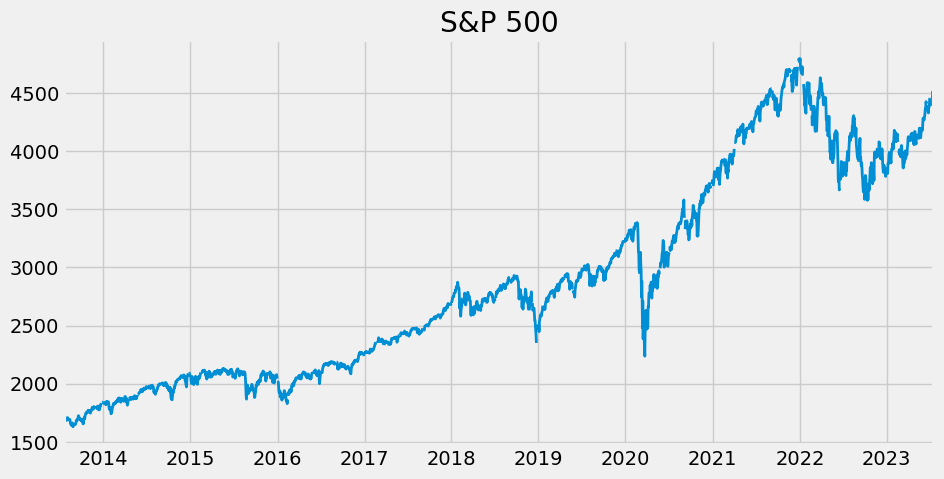

In [58]:
#using S&P 500
sp500=fred.get_series(series_id='SP500')
#plo the S&P500
sp500.plot(figsize=(10,5),title='S&P 500',lw=2)
plt.show()

### Step 5. Pull and join multiple data    

In [67]:
#search for unemployment rate and filtered by frequency and monthly 
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
#filter the two columns 
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#search the title who haz only Uneployment Rate 
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
#see the first 5 rows for our data
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-07-21,2023-07-21,Unemployment Rate,1948-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:02-05:00,93,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-07-21,2023-07-21,Unemployment Rate - Black or African American,1972-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-07 07:45:08-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-07-21,2023-07-21,Unemployment Rate in California,1976-01-01,2023-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-06-20 14:30:02-05:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-07-21,2023-07-21,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,50,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-07-21,2023-07-21,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,14,Series Is Presented Here As Three Variables--(...


In [63]:
#creat a list 
all_results = []

for myid in unemp_df.index: #creat loop to get the data from the index 
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [65]:
#creat list contain drop columns 
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [66]:
uemp_results

,CAUR,FLUR,TXUR,NYUR,OHUR,PAUR,ALUR,MIUR,NCUR,MNUR,...,MTUR,DCUR,SDUR,WYUR,IDUR,DEUR,MEUR,RIUR,NHUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,4.4,2.6,4.0,4.2,3.9,4.4,2.5,4.3,3.6,3.0,...,2.4,4.7,2.1,3.8,2.6,4.6,2.8,3.1,2.7,2.8
2023-03-01,4.4,2.6,4.0,4.1,3.8,4.2,2.3,4.1,3.5,2.8,...,2.3,4.8,1.9,3.7,2.6,4.4,2.6,3.1,2.4,2.7
2023-04-01,4.5,2.6,4.0,4.0,3.7,4.1,2.2,3.8,3.4,2.8,...,2.3,5.0,1.9,3.5,2.6,4.3,2.4,3.0,2.1,2.4
2023-05-01,4.5,2.6,4.1,3.9,3.6,4.0,2.2,3.7,3.4,2.9,...,2.3,5.1,1.9,3.3,2.6,4.2,2.4,3.0,1.9,2.1


In [68]:
uemp_states = uemp_results.copy()  
uemp_states = uemp_states.dropna() #drop NaN value 
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict() #creat a disccionary
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]# rename the columns

In [73]:
#plot the data 
px.line(uemp_states)

### Step 5.Pull May 2020 Unemployment Rate Per State

In [74]:
uemp_states.head()

,California,Florida,Texas,New York,Ohio,Pennsylvania,Alabama,Michigan,North Carolina,Minnesota,...,Montana,the District of Columbia,South Dakota,Wyoming,Idaho,Delaware,Maine,Rhode Island,New Hampshire,Vermont
1976-01-01,9.2,9.7,5.8,10.3,8.1,8.0,6.6,9.9,6.4,6.0,...,5.8,8.7,3.3,4.1,5.6,8.0,8.7,7.8,6.5,8.6
1976-02-01,9.2,9.7,5.8,10.3,8.1,8.1,6.6,9.9,6.4,6.0,...,5.8,8.7,3.3,4.1,5.6,8.0,8.7,7.8,6.5,8.6
1976-03-01,9.1,9.6,5.9,10.2,8.1,8.1,6.6,9.9,6.4,5.9,...,5.8,8.6,3.2,4.1,5.6,8.0,8.6,7.7,6.5,8.6
1976-04-01,9.1,9.5,5.9,10.2,8.0,8.1,6.5,9.8,6.3,5.8,...,5.8,8.5,3.1,4.0,5.6,8.1,8.6,7.7,6.5,8.6
1976-05-01,9.0,9.3,5.9,10.1,7.8,8.1,6.4,9.6,6.1,5.7,...,5.8,8.4,3.1,3.9,5.6,8.3,8.5,7.7,6.5,8.5


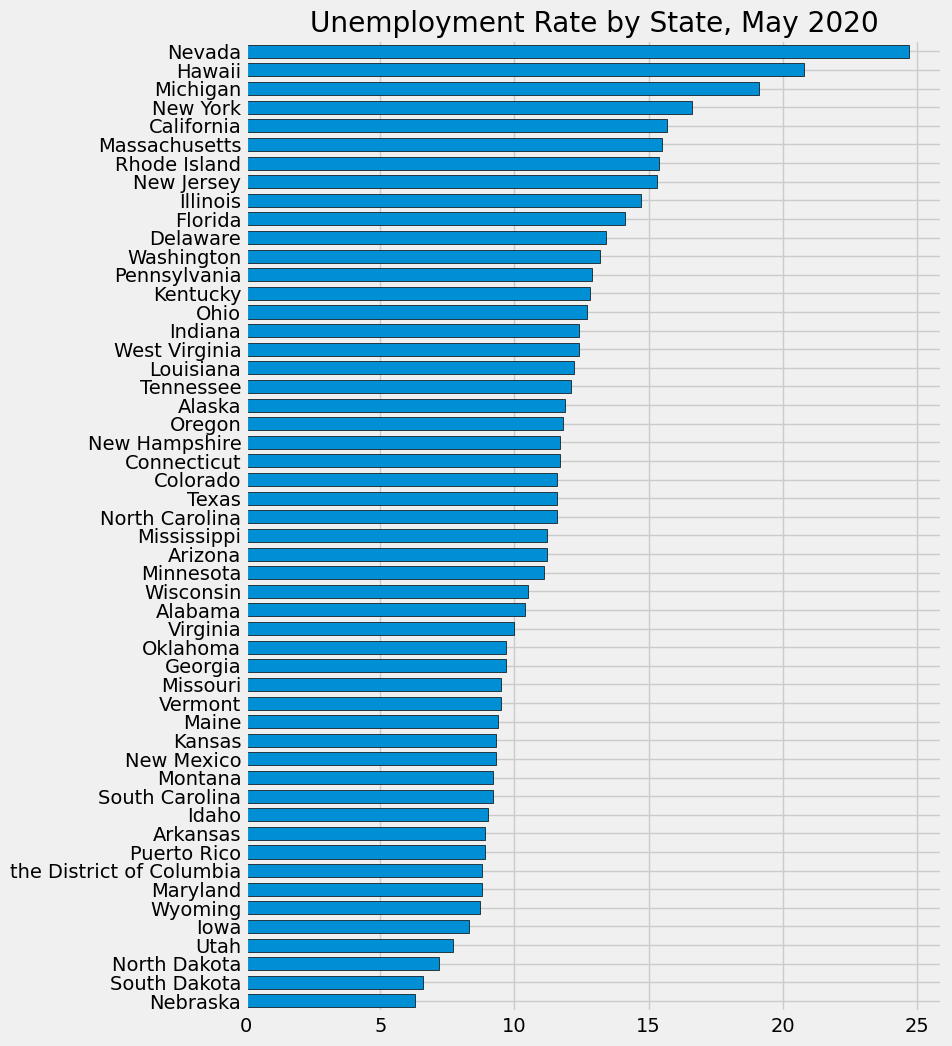

In [117]:
#filter the index by May 2020
ax=uemp_states.loc[uemp_states.index == '2020-05-01'].T
ax=ax.sort_values('2020-05-01')
ax.plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
plt.legend().remove()
plt.show()

### Step 6.Pull Participation Rate 

In [125]:
#we do the same what we did in uneployement
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
#filter the two columns 
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [127]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


## Step 7. Plot Unemployment vs Participation for each state!

In [129]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

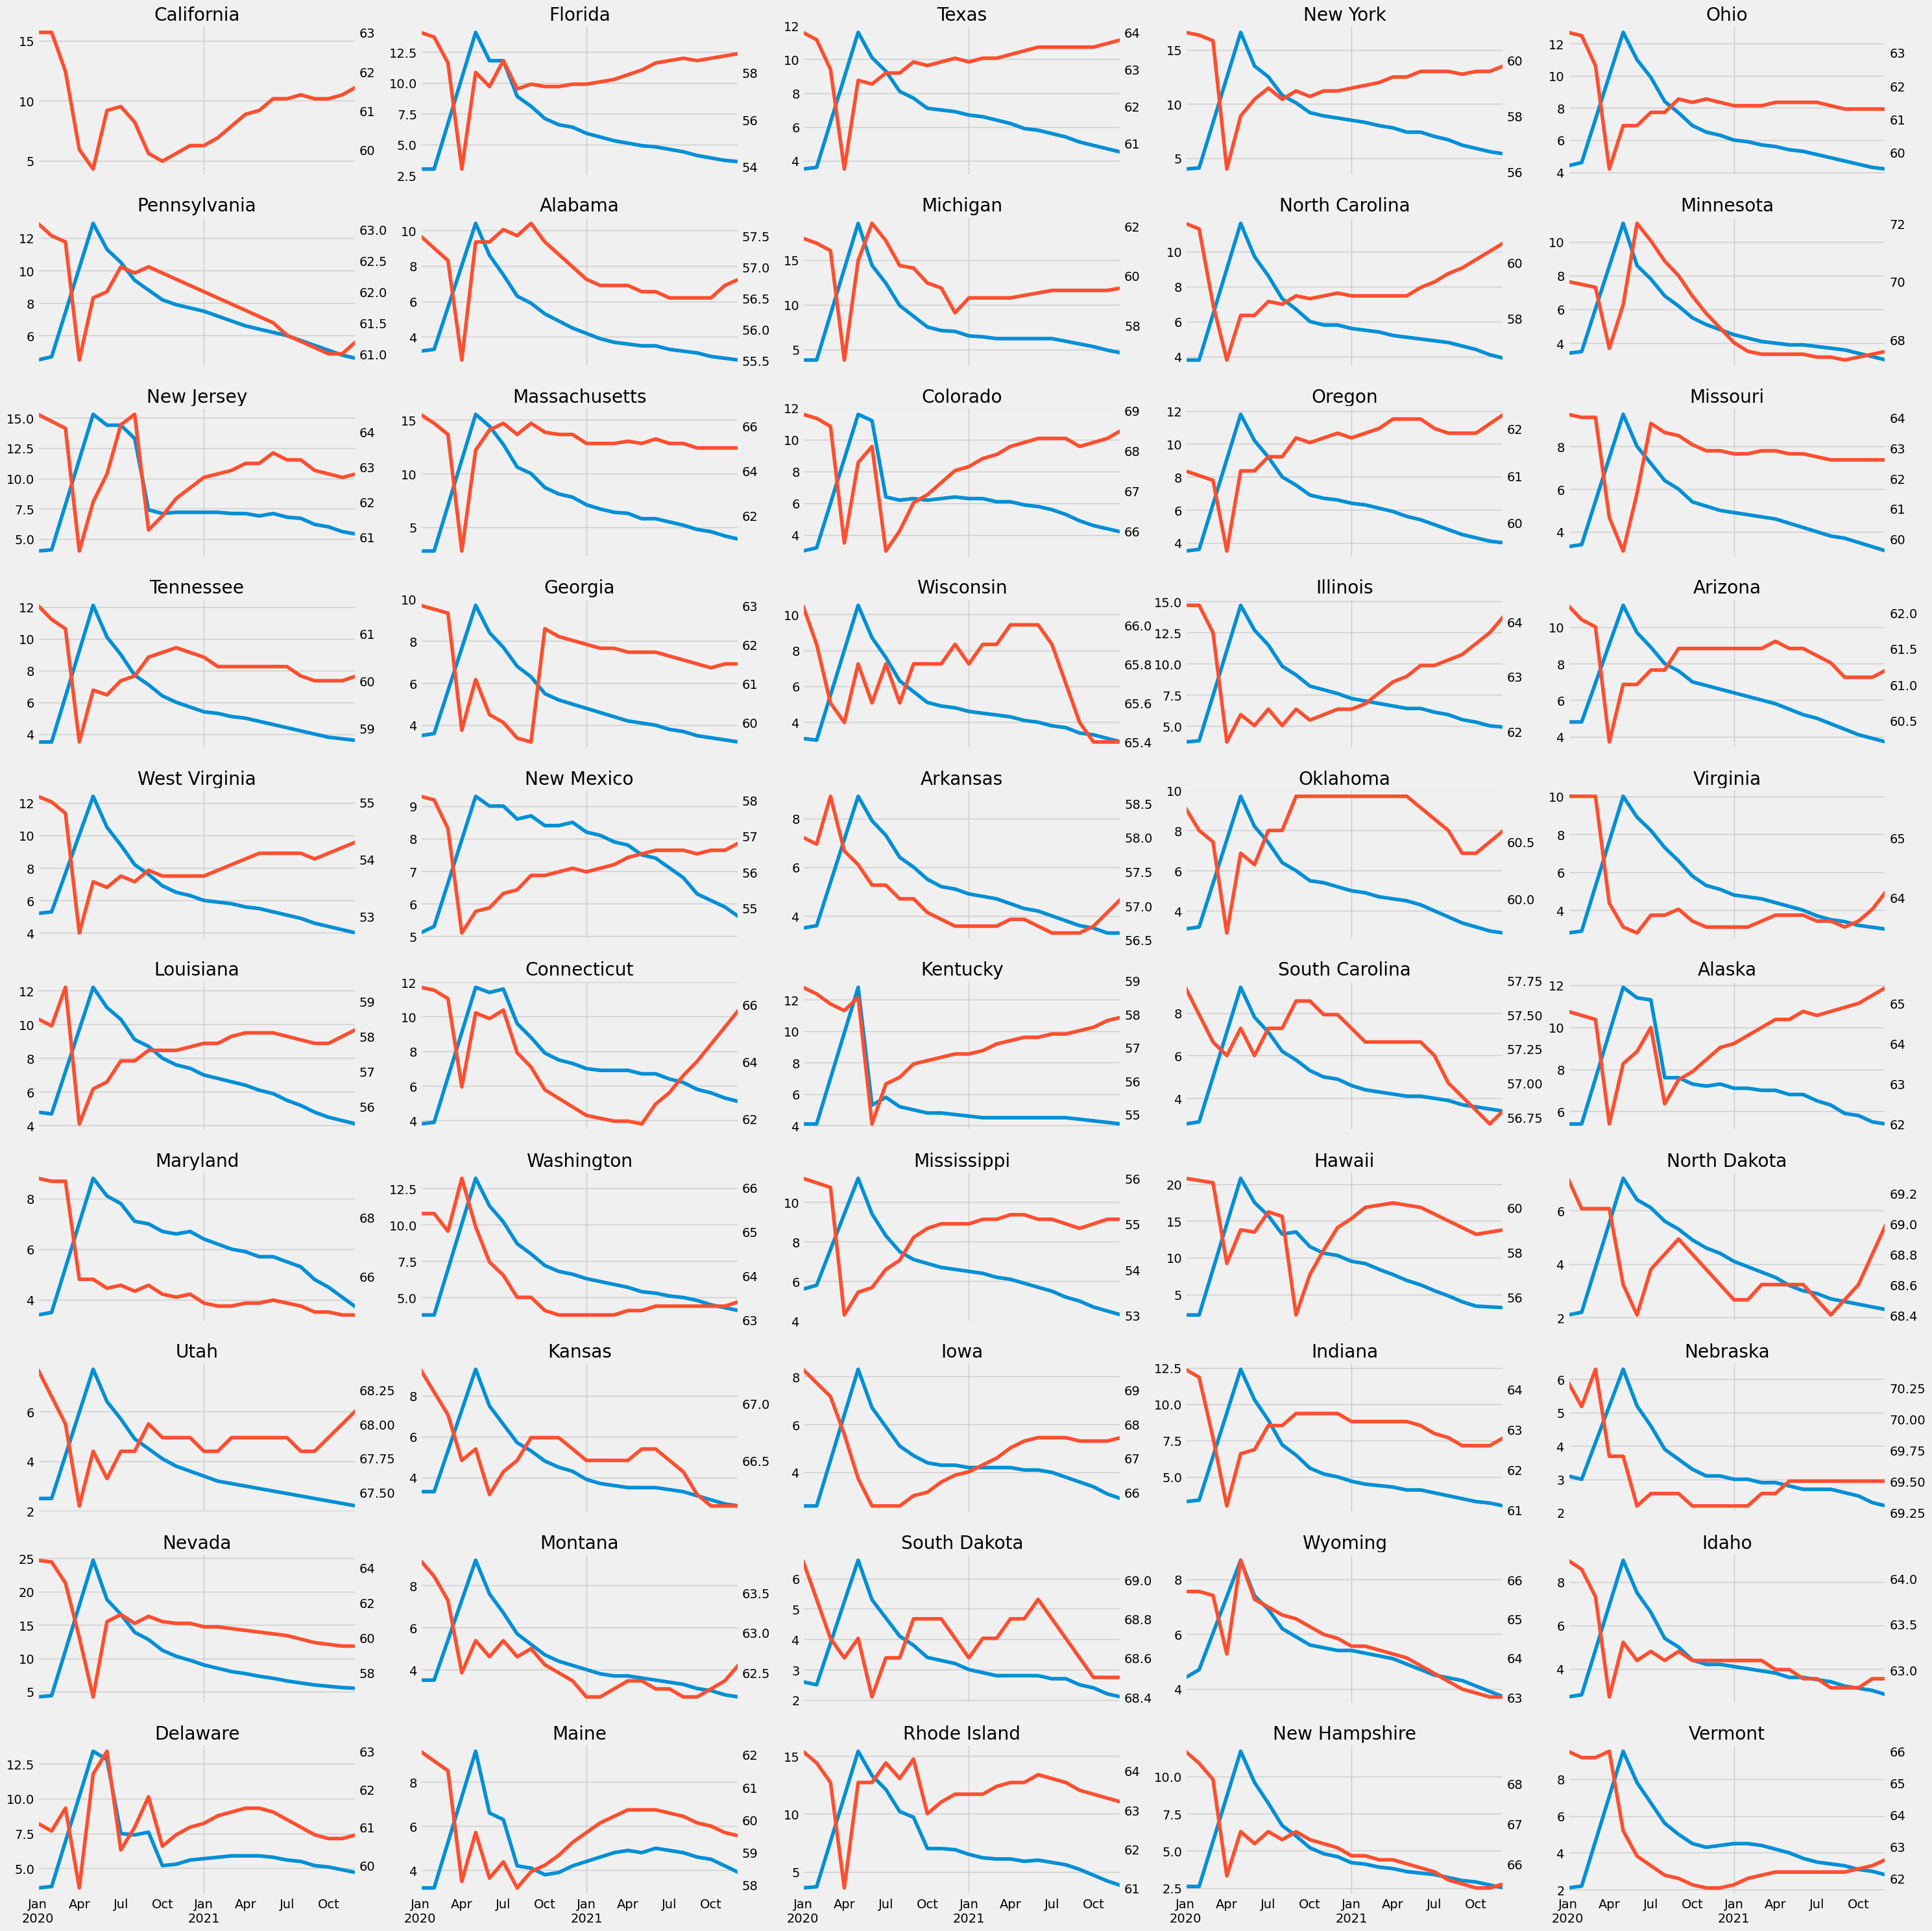

In [130]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()